In [ ]:
## Bengaluru Urban : May 1 - May 28

In [148]:
# IMPORTING NECESSARY PACKAGES
import pandas as pd
from datetime import date,datetime
import numpy as np
import matplotlib.mlab as mlab
import re
import collections as col
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install pandas_profiling
# from pandas_profiling import ProfileReport
# import joblib

In [2]:
annexure_may = pd.read_excel(r'C:\Users\win10\Desktop\Sakhyaa project\MAY\annexure_May28.xlsx')
annexure_may = annexure_may.iloc[:,1:]
annexure_may.head(5)

,District,StateP No.,Age inYears,Sex,Description,Symptoms,Co-Morbidities,DOA,DOD,Place ofDeath,Date
0,BengaluruUrban,1076587,56,F,ILI,"Fever,Cough",DM,16-04-2021,24-04-2021,Private Hospital,01-05-2021
1,BengaluruUrban,1078144,61,F,SARI,"Cough,Breathlessness",-,10-04-2021,28-04-2021,Designated Hospital,01-05-2021
2,BengaluruRural,1087002,55,F,SARI,Breathlessness,"DM,HTN",11-04-2021,30-04-2021,Private Hospital,01-05-2021
3,BengaluruUrban,1093880,64,M,SARI,Breathlessness,-,14-04-2021,24-04-2021,Designated Hospital,01-05-2021
4,BengaluruUrban,1095273,85,M,SARI,Breathlessness,IHD,14-04-2021,24-04-2021,Private Hospital,01-05-2021


In [3]:
Bengaluru = annexure_may[annexure_may['District'].str.match(r'Bengaluru ?[Uu]rban*?') == True]
Bengaluru = Bengaluru.reset_index().iloc[:,1:]
Bengaluru.head(5)

,District,StateP No.,Age inYears,Sex,Description,Symptoms,Co-Morbidities,DOA,DOD,Place ofDeath,Date
0,BengaluruUrban,1076587,56,F,ILI,"Fever,Cough",DM,16-04-2021,24-04-2021,Private Hospital,01-05-2021
1,BengaluruUrban,1078144,61,F,SARI,"Cough,Breathlessness",-,10-04-2021,28-04-2021,Designated Hospital,01-05-2021
2,BengaluruUrban,1093880,64,M,SARI,Breathlessness,-,14-04-2021,24-04-2021,Designated Hospital,01-05-2021
3,BengaluruUrban,1095273,85,M,SARI,Breathlessness,IHD,14-04-2021,24-04-2021,Private Hospital,01-05-2021
4,BengaluruUrban,1103125,54,M,SARI,"Fever,Breathlessness",-,13-04-2021,23-04-2021,Designated Hospital,01-05-2021


## UNIVARIATE PLOTS

## Age

In [13]:
def treatage(col):
    newcol=[]
    for i in col:
        if(re.search('[a-zA-Z]',i)):
            newcol.append(0)
        else:
            i = float(i)
            newcol.append(int(i))
    return newcol     

Bengaluru['Age inYears']=Bengaluru['Age inYears'].astype(str)
Bengaluru['Age inYears']=treatage(Bengaluru['Age inYears'])
Bengaluru.drop(Bengaluru[Bengaluru['Age inYears'] == 0].index, inplace = True)

In [14]:
Bengaluru['Age inYears'].describe()

count    6273.000000
mean       61.573250
std        14.795096
min        19.000000
25%        51.000000
50%        62.000000
75%        72.000000
max       102.000000
Name: Age inYears, dtype: float64

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age inYears'>

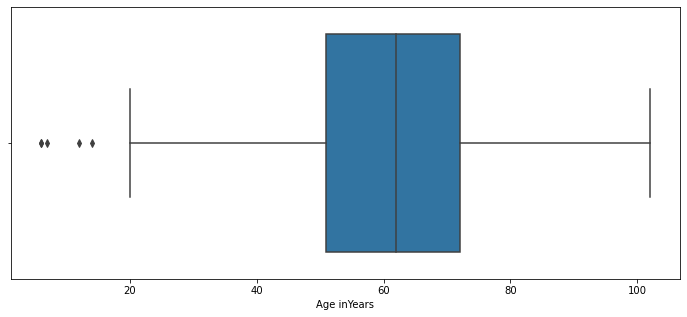

In [6]:
plt.figure(figsize=(12,5))
sns.boxplot(Bengaluru['Age inYears'])

In [7]:
# Treating outliers
Q1 = Bengaluru['Age inYears'].quantile(0.25)
Q3 = Bengaluru['Age inYears'].quantile(0.75)
IQR = Q3 - Q1
maxi=Q3+1.5*IQR
mini=Q1-1.5*IQR
print("The outliers are")
for i in Bengaluru['Age inYears']:
    if i>maxi:
        print(i,end=" ")
    elif i<mini:
        print(i,end=" ")
    else:
        pass
    
Bengaluru.loc[Bengaluru['Age inYears'] < mini, "Age inYears"] = mini
Bengaluru.loc[Bengaluru['Age inYears'] > maxi, "Age inYears"] = maxi

The outliers are
6 14 6 7 12 

<AxesSubplot:xlabel='Age inYears', ylabel='Count'>

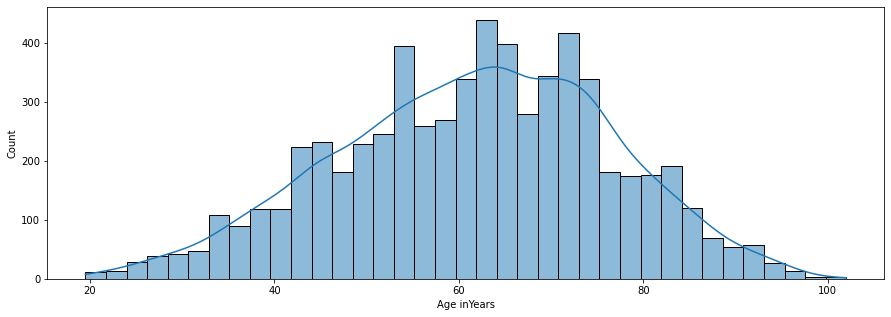

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(x='Age inYears',data=Bengaluru,kde=True)

**Majority of the people who suffered and dies from Covid-19 belong to the age gap 60-75.**

# Gender and Description

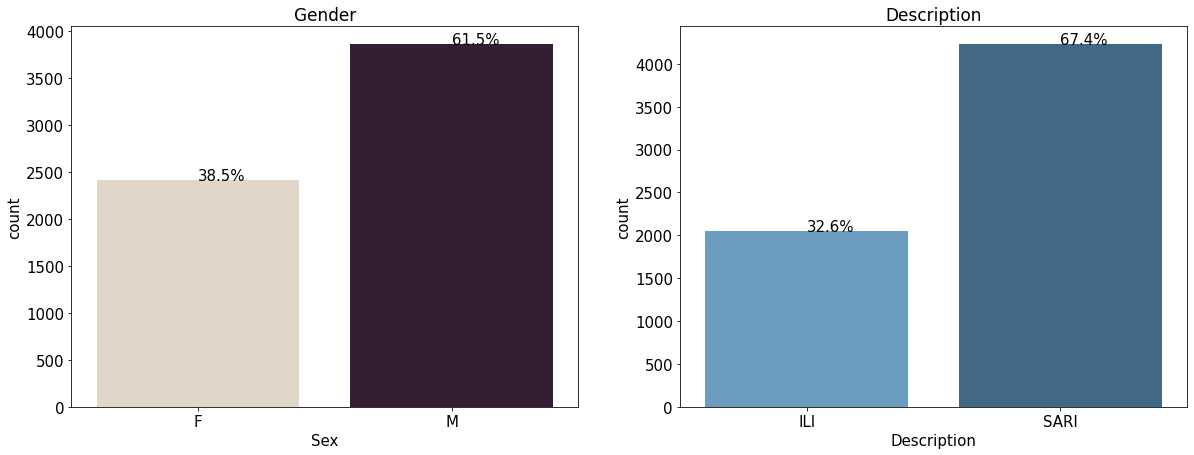

In [9]:
fig = plt.figure(figsize=(20,7))

plt.rcParams['font.size'] = 15.0
fig.add_subplot(1,2,1)
ax = sns.countplot(x="Sex", data=Bengaluru,palette='ch:.25')
plt.title('Gender', fontsize = 17)
total = len(Bengaluru['Sex'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_y() + p.get_height() + 0.02
        y = p.get_x() + p.get_width()/2
        ax.annotate(percentage, (y, x), alpha = 1)

        
fig.add_subplot(1,2,2)
ax = sns.countplot(x="Description", data=Bengaluru,palette='Blues_d')
plt.title('Description', fontsize = 17)
total = len(Bengaluru['Description'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_y() + p.get_height() + 0.02
        y = p.get_x() + p.get_width()/2
        ax.annotate(percentage, (y, x), alpha = 1)
        

## Gender  
**With respect to the first graph we see that it is the males who are leading by a percentage of 61.5 when compared to the females who attained the percentage of 38.5. It is quite evident that the admission and death rate of males is greater than females.**  


## Description :  
**Here SARI which indicates Severe Acute Respiratory Illness is seen in about 67.4% of people while ILI which stands for Influenza Like Illness is seen 32.6% of the people. This indicates that severe respiratory problems were experienced by majority of the people who suffered from Covid 19**

#  Comorbodities 

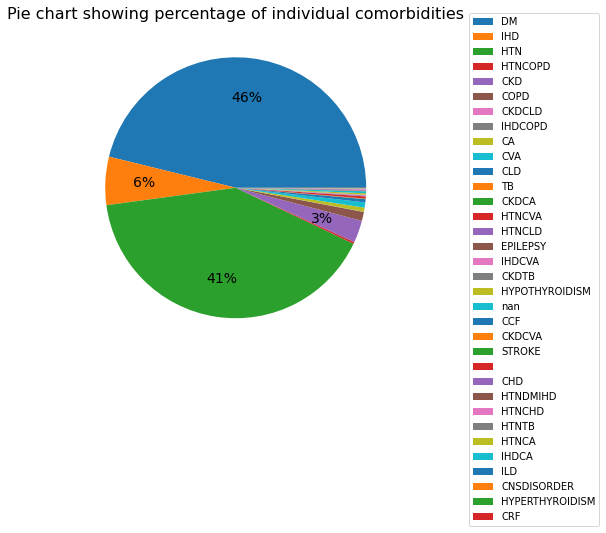

{'DM': 3007, 'HTN': 2657, 'IHD': 389, 'CKD': 179, 'COPD': 72, 'CVA': 42, 'CA': 33, 'CLD': 26, 'HTNCVA': 17, 'nan': 16, 'HTNCOPD': 15, 'HYPOTHYROIDISM': 12, 'CHD': 7, 'HTNCLD': 6, 'IHDCVA': 4, 'HTNCHD': 4, 'TB': 3, '': 3, 'CKDCA': 2, 'CKDTB': 2, 'HTNCA': 2, 'IHDCA': 2, 'CNSDISORDER': 2, 'CKDCLD': 1, 'IHDCOPD': 1, 'EPILEPSY': 1, 'CCF': 1, 'CKDCVA': 1, 'STROKE': 1, 'HTNDMIHD': 1, 'HTNTB': 1, 'ILD': 1, 'HYPERTHYROIDISM': 1, 'CRF': 1}


In [10]:
fig = plt.figure(figsize=(15,6))
plt.rcParams['font.size'] = 14.0
com_list = []
for i in Bengaluru['Co-Morbidities'].astype(str):
    if i != '-' and i != '_':
        temp = re.split(r',| , |, | ,', i)
        com_list += temp
com_freq = col.Counter(com_list)
com_freq.popitem()

def autopct(pct): # only show the label when it's > 10%
    return ('%.f%%' % pct) if pct > 2 else ''

plt.pie(com_freq.values(), rotatelabels = 180, autopct=autopct, pctdistance = 0.7)
plt.title('Pie chart showing percentage of individual comorbidities', fontsize = 16)
plt.legend(com_freq,
          loc ="center left",
          bbox_to_anchor =(1.2, 0, 1.5, 0.5),
          fontsize = 10)

plt.show()

sorted_dict = {}
sorted_keys = sorted(com_freq, key=com_freq.get, reverse = True)

for w in sorted_keys:
    sorted_dict[w] = com_freq[w]

print(sorted_dict)


**Among the people who died, 47% of them were suffering from Diabetes Mellitus, while 41% of them were suffering from Hyper Tension followed by 6% with Ischemic Heart Disease. And there were a number of other comorbodities whose percentage was less than 1.**

In [34]:
com_list = []
for i in Bengaluru['Co-Morbidities'].astype(str):
    if i != '-' and i != '_':
        temp = re.split(r',| , |, | ,', i)
        com_list += temp
com_freq = col.Counter(com_list)

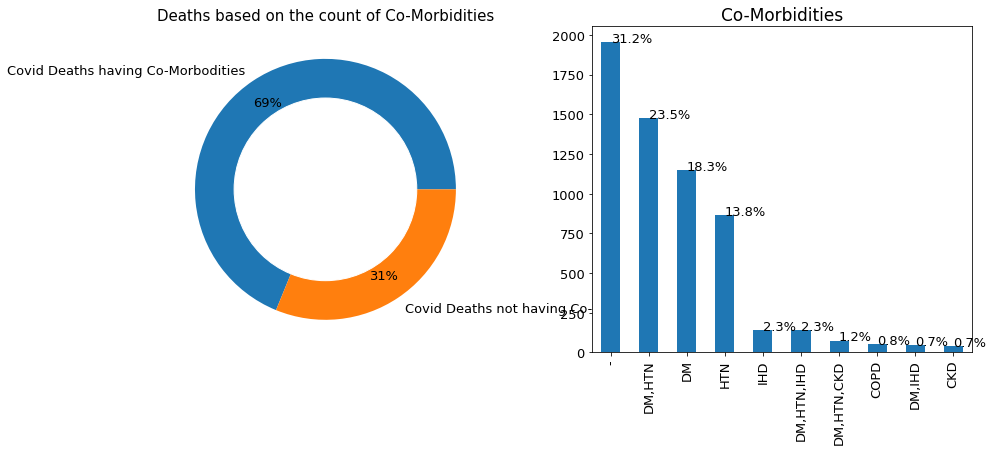

In [35]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
comorb_count = {}
count_o = 0; count_c = 0;
for comorb in Bengaluru['Co-Morbidities']:
    if comorb == '-' or comorb == '_':
        count_o += 1
    else:
        count_c += 1
comorb_count['Covid Deaths having Co-Morbodities'] = count_c
comorb_count['Covid Deaths not having Co-Morbodities'] = count_o

plt.rcParams['font.size'] = 13.0
plt.pie(comorb_count.values(), labels = comorb_count.keys(), autopct='%0.f%%', pctdistance=0.80)
plt.title('Deaths based on the count of Co-Morbidities', fontsize = 15)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

fig.add_subplot(1,2,2)
ax =Bengaluru['Co-Morbidities'].value_counts().head(10).plot(kind="bar")
plt.title('Co-Morbidities', fontsize = 17)
total = len(Bengaluru['Co-Morbidities'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_y() + p.get_height() + 0.02
        y = p.get_x() + p.get_width()/2
        ax.annotate(percentage, (y, x), alpha = 1)

**Its interesting to note that among the people who died due to covid-19, 31% did not have any pre existing health issues.**  
  
**Among the 69% with comorbodities, 55.6% were suffering from either Diabetes Mellitus, Hypertension or both.**

# Symptoms :

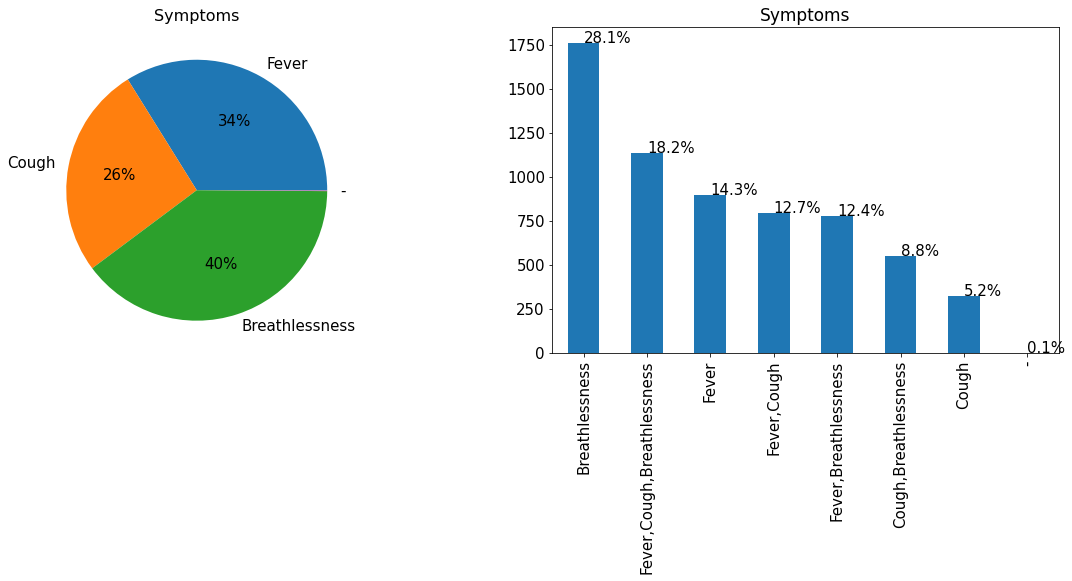

In [33]:
fig = plt.figure(figsize=(20,6))
symptom_list = []
symptoms = Bengaluru['Symptoms'].astype(str)
for i in symptoms:
    temp = re.split(r', |,| ,| , ',i)
    symptom_list += temp

symptom_freq = col.Counter(symptom_list)
del symptom_freq['feverbrathlessness']
symptom_freq.popitem()

def autopct(pct): # only show the label when it's > 10%
    return ('%.f%%' % pct) if pct > 10 else ''
fig.add_subplot(1,2,1)
plt.rcParams['font.size'] = 15.0
plt.pie(symptom_freq.values(), labels = symptom_freq.keys(), autopct=autopct, pctdistance = 0.6)
plt.title('Symptoms', fontsize = 16)


fig.add_subplot(1,2,2)
ax =Bengaluru['Symptoms'].value_counts().head(8).plot(kind="bar")
plt.title('Symptoms', fontsize = 17)
total = len(Bengaluru['Symptoms'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_y() + p.get_height() + 0.02
        y = p.get_x() + p.get_width()/2
        ax.annotate(percentage, (y, x), alpha = 1)

**Among the major symptoms observed in the patients, breathlessness occupies 40% while fever is seen in 34% of people followed by Cough with 26%.**  
**But its also interesting to note that patients did not experience only one kind of symptom but a combination of them. Among which 18.2% suffered from a combination of fever, cough, breathlessness. There were 28.1% of patients who suffered only from breathlessness, 14.3% from fever only, and the rest had a combination of either symptoms.**

### BIVARIATE PLOTS

# Age vs Covid Description 

In [15]:
Bengaluru['Age inYears']=Bengaluru['Age inYears'].astype(str)
Bengaluru['Age inYears']=treatage(Bengaluru['Age inYears'])
Bengaluru.drop(Bengaluru[Bengaluru['Age inYears'] ==0].index, inplace = True)

Bengaluru['Age'] =  pd.qcut(Bengaluru['Age inYears' ], q=5, precision = 0)

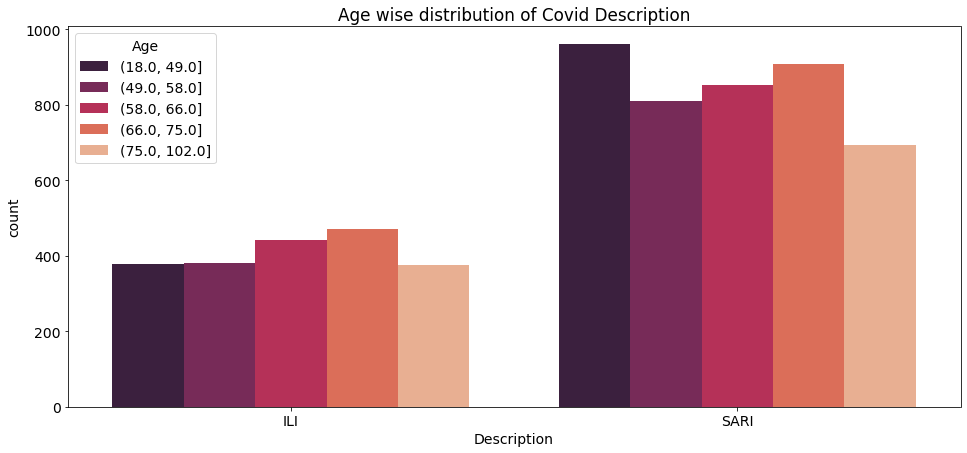

In [16]:
age_vs_desc = plt.figure(figsize=(16, 7))
age_vs_desc = plt.title("Age wise distribution of Covid Description")
age_vs_desc = sns.countplot(x='Description', data=Bengaluru, hue = 'Age', palette="rocket")

**Among the people who suffered from Influenza like illness majority of them were from age group 58-75. And among the people who suffered from Severe Acute Respiratory Illness majority of them were from age group 5-49.**

# Age vs Common Comorbidities

In [36]:
blore = Bengaluru[Bengaluru['Co-Morbidities'].isin(['DM','HTN','IHD','DM,HTN', 'DM,HTN,IHD'])]
blore = blore[blore['Symptoms'].isin(['Fever', 'Cough', 'Breathlessness', 'Fever,Cough', 'Fever,Cough,Breathlessness', 'Fever,Breathlessness'])]

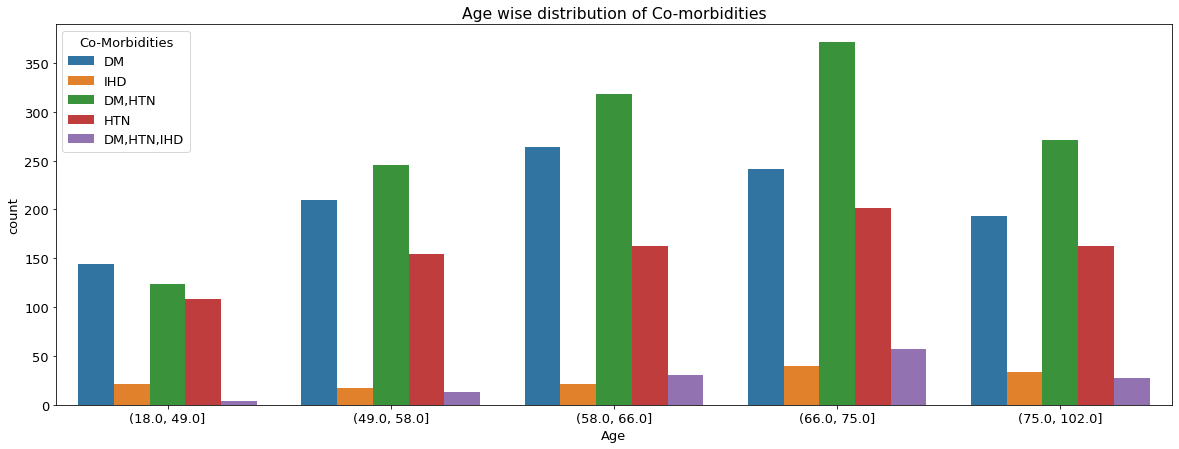

In [68]:
age_vs_comorbidities = plt.figure(figsize=(20, 7))
age_vs_comorbidities = plt.title("Age wise distribution of Co-morbidities")
age_vs_comorbidities = sns.countplot(x='Age', data=blore, hue = 'Co-Morbidities', palette="tab10")

**We see that majority of people who suffered due to covid 19 belonged to age grp 60-75 and they had a pre existing health of both Diabetes Mellitus and Hyper Tension.**
**It is notable that patients below 49 years did not have as many co-morbodities as others, but it was Diabetes Mellitus which was leading among them.**

# Age vs Common Symptoms

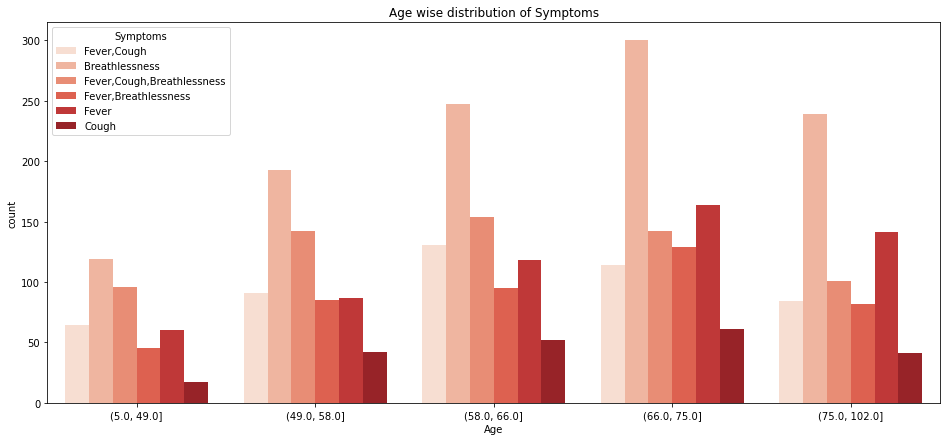

In [261]:
age_vs_symptoms = plt.figure(figsize=(16, 7))
age_vs_symptoms = plt.title("Age wise distribution of Symptoms")
# age_vs_symptoms = sns.countplot(x='Age', data=Bengaluru, hue = 'Symptoms', palette="tab10")
age_vs_symptoms = sns.countplot(x='Age', data=blore, hue = 'Symptoms', palette="Reds")

**We see that in general irrespective of which age group one belonged to, they had only Breathlessness as a common and a leading symptom.**  
**People above 66 years majourly had either breathlessnes or fever as a leading factor of symptoms.While people below 66 years did have a number of indicators which includes a combination of fever, cough, breathlessness.**

## Age vs Gender 

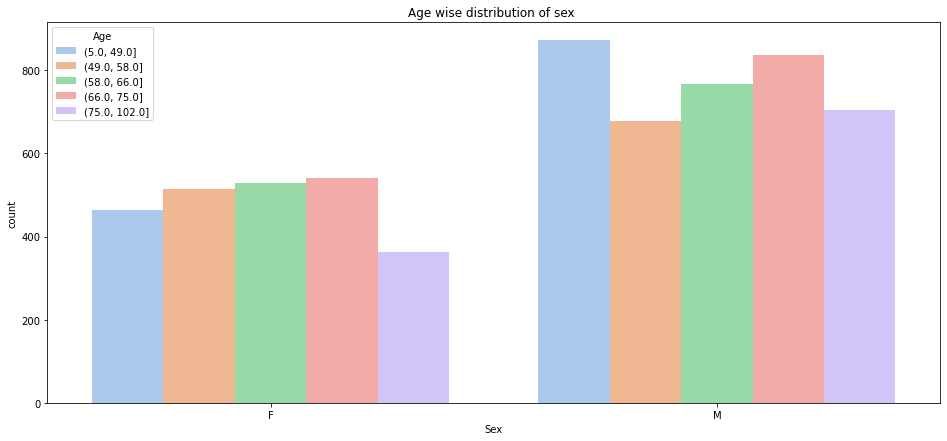

In [262]:
age_vs_sex = plt.figure(figsize=(16, 7))
age_vs_sex = plt.title("Age wise distribution of sex ")
age_vs_sex = sns.countplot(x='Sex', data=Bengaluru, hue = 'Age', palette="pastel")

**We see that among the males who are leading, majority of them who have succumbed to death due to covid are below 49 years of age. While minority of them who have succumbed to death are in the age of 49-58**  
**Among the females which is a minority compared to males, it is majorly women within the age 66-75 who have succumbed to death**

In [256]:
profile=ProfileReport(Bengaluru,title='Bengaluru Report',explorative=True)
profile.to_widgets()
profile.to_file('bengaluru.html')

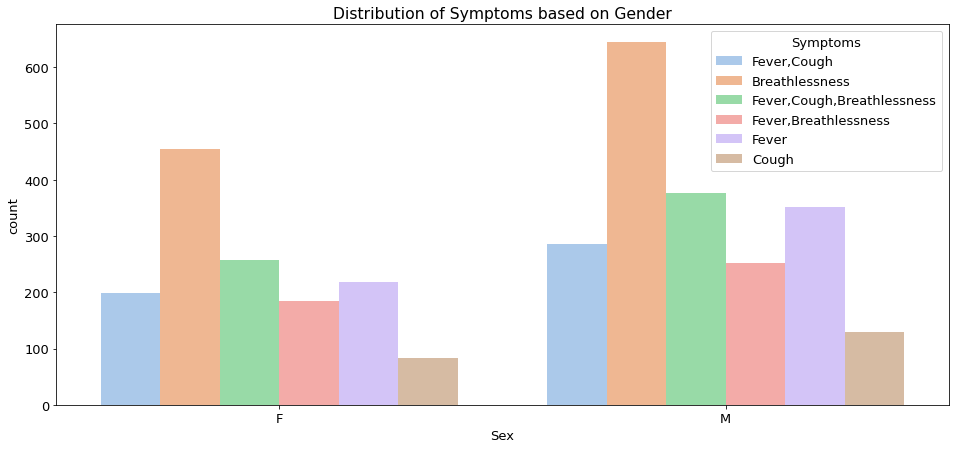

In [39]:
symp_vs_sex = plt.figure(figsize=(16, 7))
symp_vs_sex = plt.title("Distribution of Symptoms based on Gender")
symp_vs_sex = sns.countplot(x='Sex', data=blore, hue = 'Symptoms', palette="pastel")

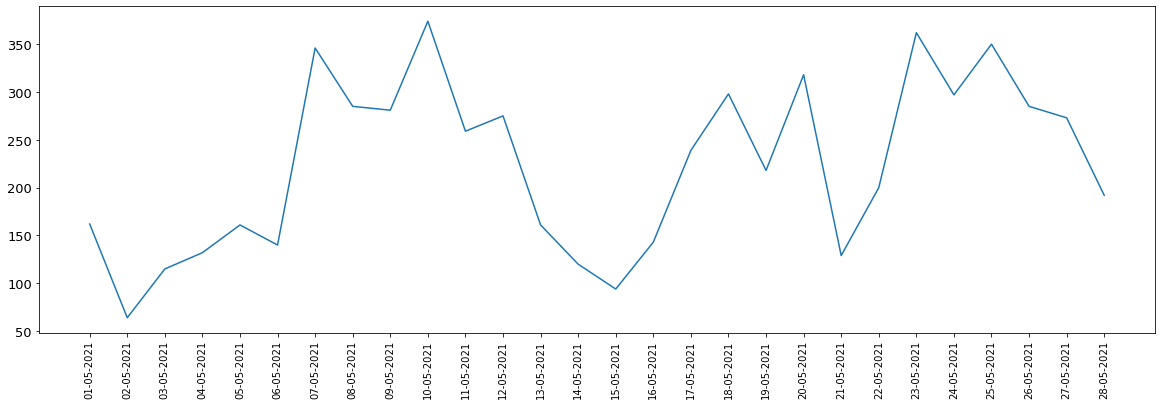

In [130]:
fig = plt.figure(figsize=(20,6))
date_counts = Bengaluru['Date'].value_counts().sort_index(ascending=True)
date_deaths = plt.plot(date_counts.index, date_counts.values)
date_deaths = plt.xticks(rotation=90)
date_deaths = plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

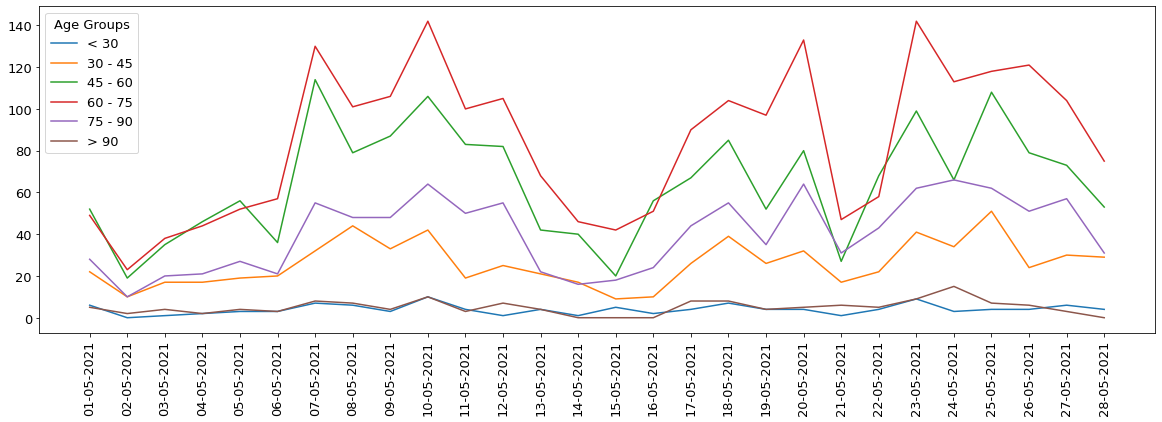

In [145]:
bins= [0,30,45,60,75,90,105]
labels = ['< 30', '30 - 45', '45 - 60', '60 - 75', '75 - 90', '> 90']
age = pd.DataFrame()
age[['Date', 'Age inYears']] = Bengaluru[['Date', 'Age inYears']]
age['Age_Groups'] = pd.cut(age['Age inYears'], bins=bins, labels=labels, right=False)
deaths_count = pd.crosstab(age.Date, age.Age_Groups)

fig = plt.figure(figsize=(20,6))
plt.plot(deaths_count.index, deaths_count.iloc[:,0] , label = "< 30")
plt.plot(deaths_count.index, deaths_count.iloc[:,1] , label = "30 - 45")
plt.plot(deaths_count.index, deaths_count.iloc[:,2] , label = "45 - 60")
plt.plot(deaths_count.index, deaths_count.iloc[:,3] , label = "60 - 75")
plt.plot(deaths_count.index, deaths_count.iloc[:,4] , label = "75 - 90")
plt.plot(deaths_count.index, deaths_count.iloc[:,5] , label = "> 90")
leg = plt.legend();
plt.legend(title = "Age Groups")
date_deaths = plt.xticks(rotation=90)